<a href="https://colab.research.google.com/github/yesyell/DA_School_1/blob/main/EDA/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%EC%8A%A4%EC%BF%A8_0601.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 시각화 모듈 (라이브러리)

- Matplotlib
- Seaborn

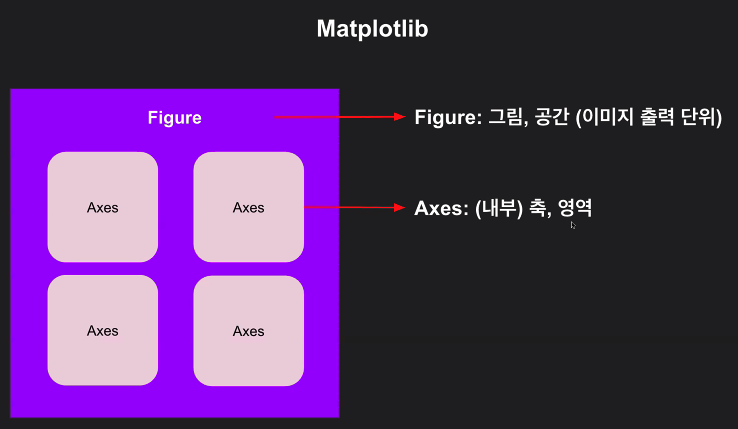

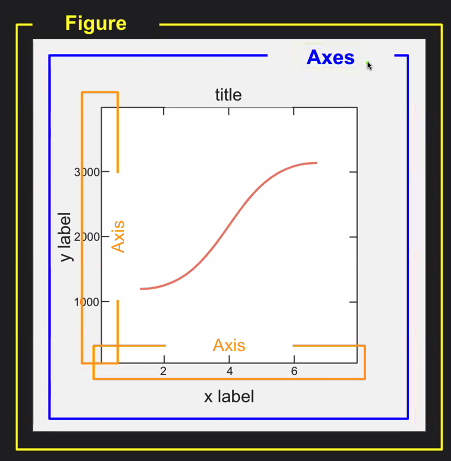

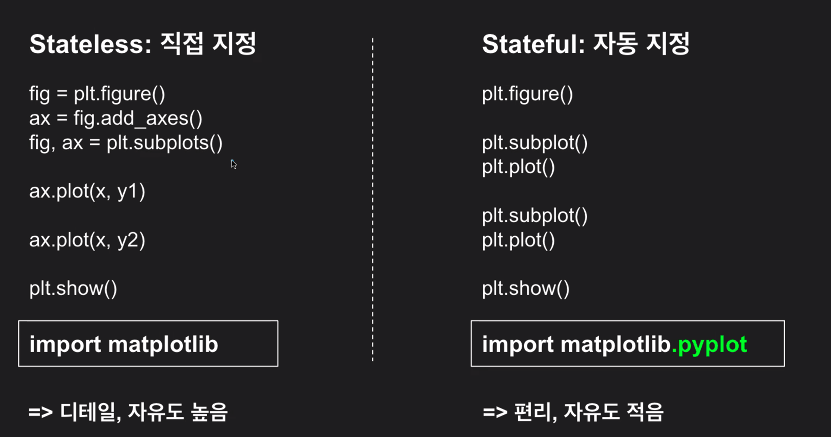

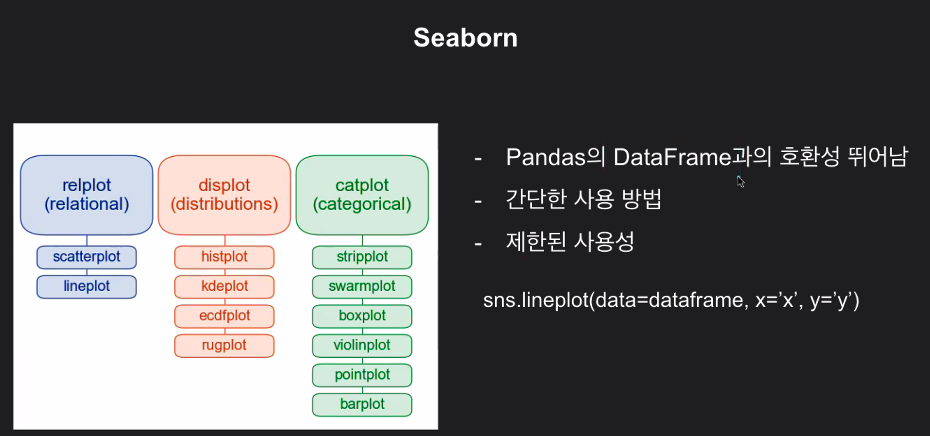

In [1]:
import seaborn as sns

In [2]:
# seaborn에서 제공하는 데이터셋
penguins = sns.load_dataset('penguins')
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


<Axes: xlabel='flipper_length_mm', ylabel='Count'>

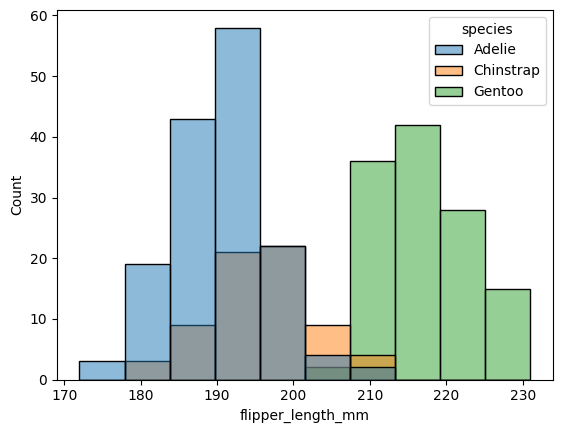

In [3]:
sns.histplot(data=penguins, x='flipper_length_mm', hue='species') # hue 범례 지정 

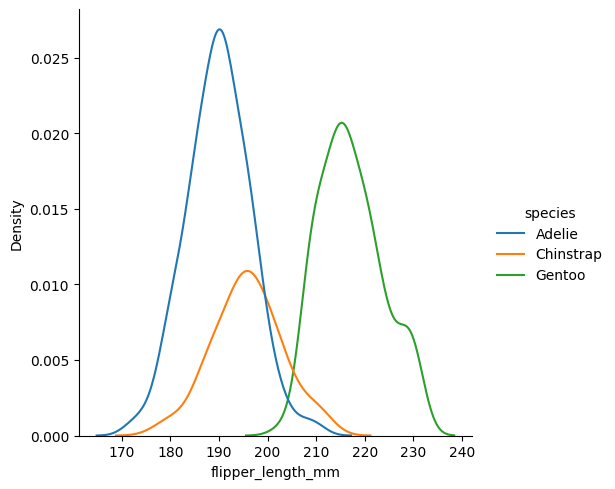

In [4]:
sns.displot(data=penguins, x='flipper_length_mm', hue='species', kind='kde') # 커널밀도추정

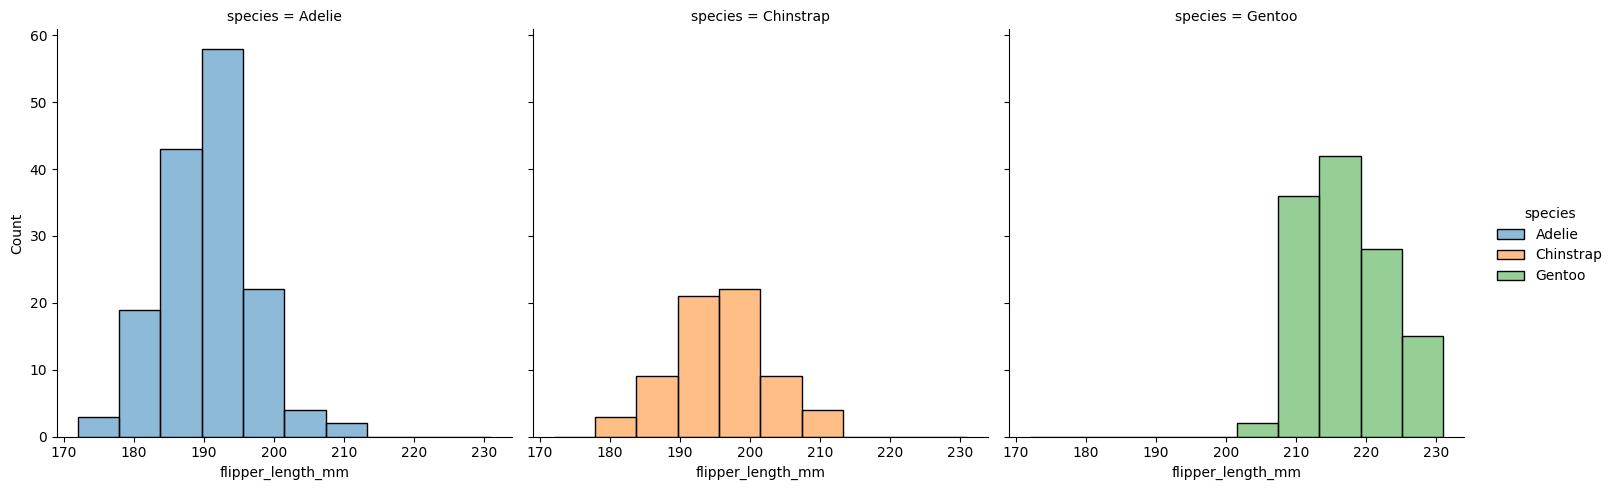

In [5]:
sns.displot(data=penguins, x='flipper_length_mm', hue='species', col='species') 

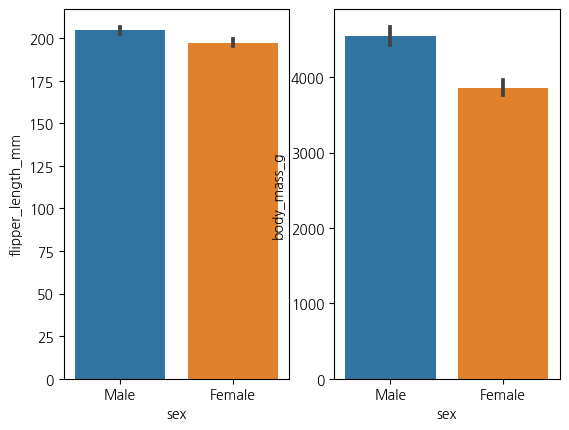

In [84]:
import matplotlib.pyplot as plt

# stateless 방법으로 subplot 지정 (행, 열)
f, ax = plt.subplots(1, 2)
sns.barplot(data=penguins, x='sex', y='flipper_length_mm', ax=ax[0])
sns.barplot(data=penguins, x='sex', y='body_mass_g', ax=ax[1])

plt.show()

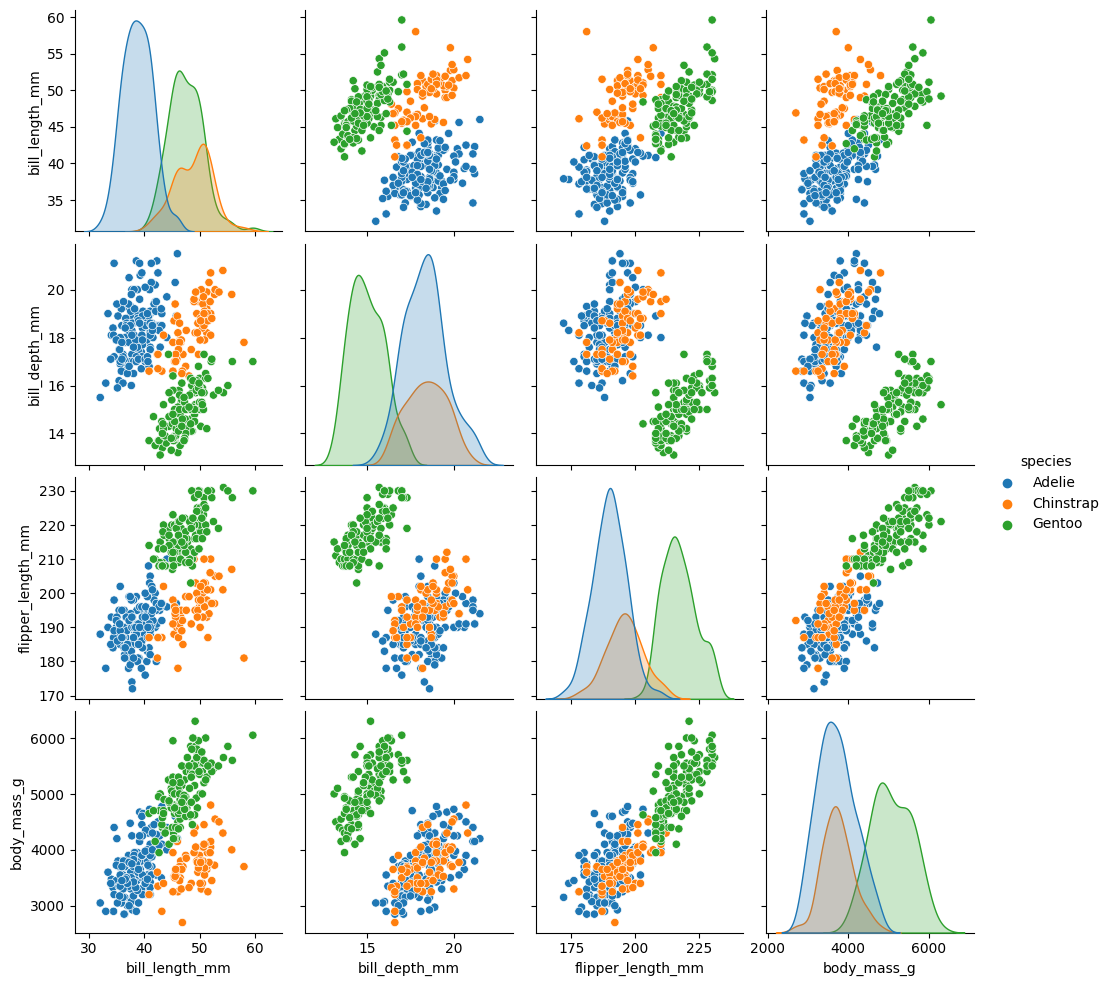

In [7]:
sns.pairplot(data=penguins, hue='species') 
# 상관관계에 대한 그래프 -> 변수들 간의 상관관계를 한 번 보여줌 
# 상관관계: 수치형 데이터만 가능

<ipython-input-8-060176f37df1>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  glue = sns.load_dataset('glue').pivot('Model', 'Task', 'Score') # 수치형 데이터


<Axes: xlabel='Task', ylabel='Model'>

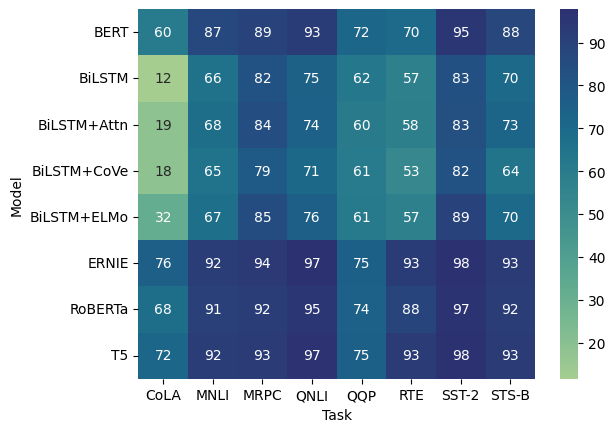

In [8]:
glue = sns.load_dataset('glue').pivot('Model', 'Task', 'Score') # 수치형 데이터 
sns.heatmap(glue, annot=True, cmap='crest')

- 변수 간 상관관계 -> pairplot, heatmap

## 상관관계 (Correlation Coefficient)

> 두 변수가 직선(선형)관계에 있다.
- 두 변수의 인과 관계를 나타내는 것이 아님

> -1 에서 1 까지의 값을 가진다.
- 양수 : 양의 상관 계수 (비례), 음수 : 음의 상관 계수 (반비례)
- -1, 1 에 가까울수록 두 변수의 상관 관계가 높음

- 상관관계 그래프를 그리기는 쉬움 -> 왜 그리는지, 어떻게 해석할지
- 불러오고, 살펴보고, 전처리 -> 상관관계 추가

### IBM Attrition 데이터

- IBM에서 만든 데이터 (가상 데이터)
- 여러 변수들 (연봉, 직업만족도 ...) -> 퇴사율

[Kaggle](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset)

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition_2.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [11]:
df.info() # 데이터 타입 -> int, float / object 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [12]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [13]:
# object(string) -> 내가 어떤 형태로 변환해야 하는가?
# object 인식이 어려운 경우가 많음 
# -> 2가지 : one-hot encoding(0, 1), 여러 종류 labelencoding(0, 1, 2, 3, ...)

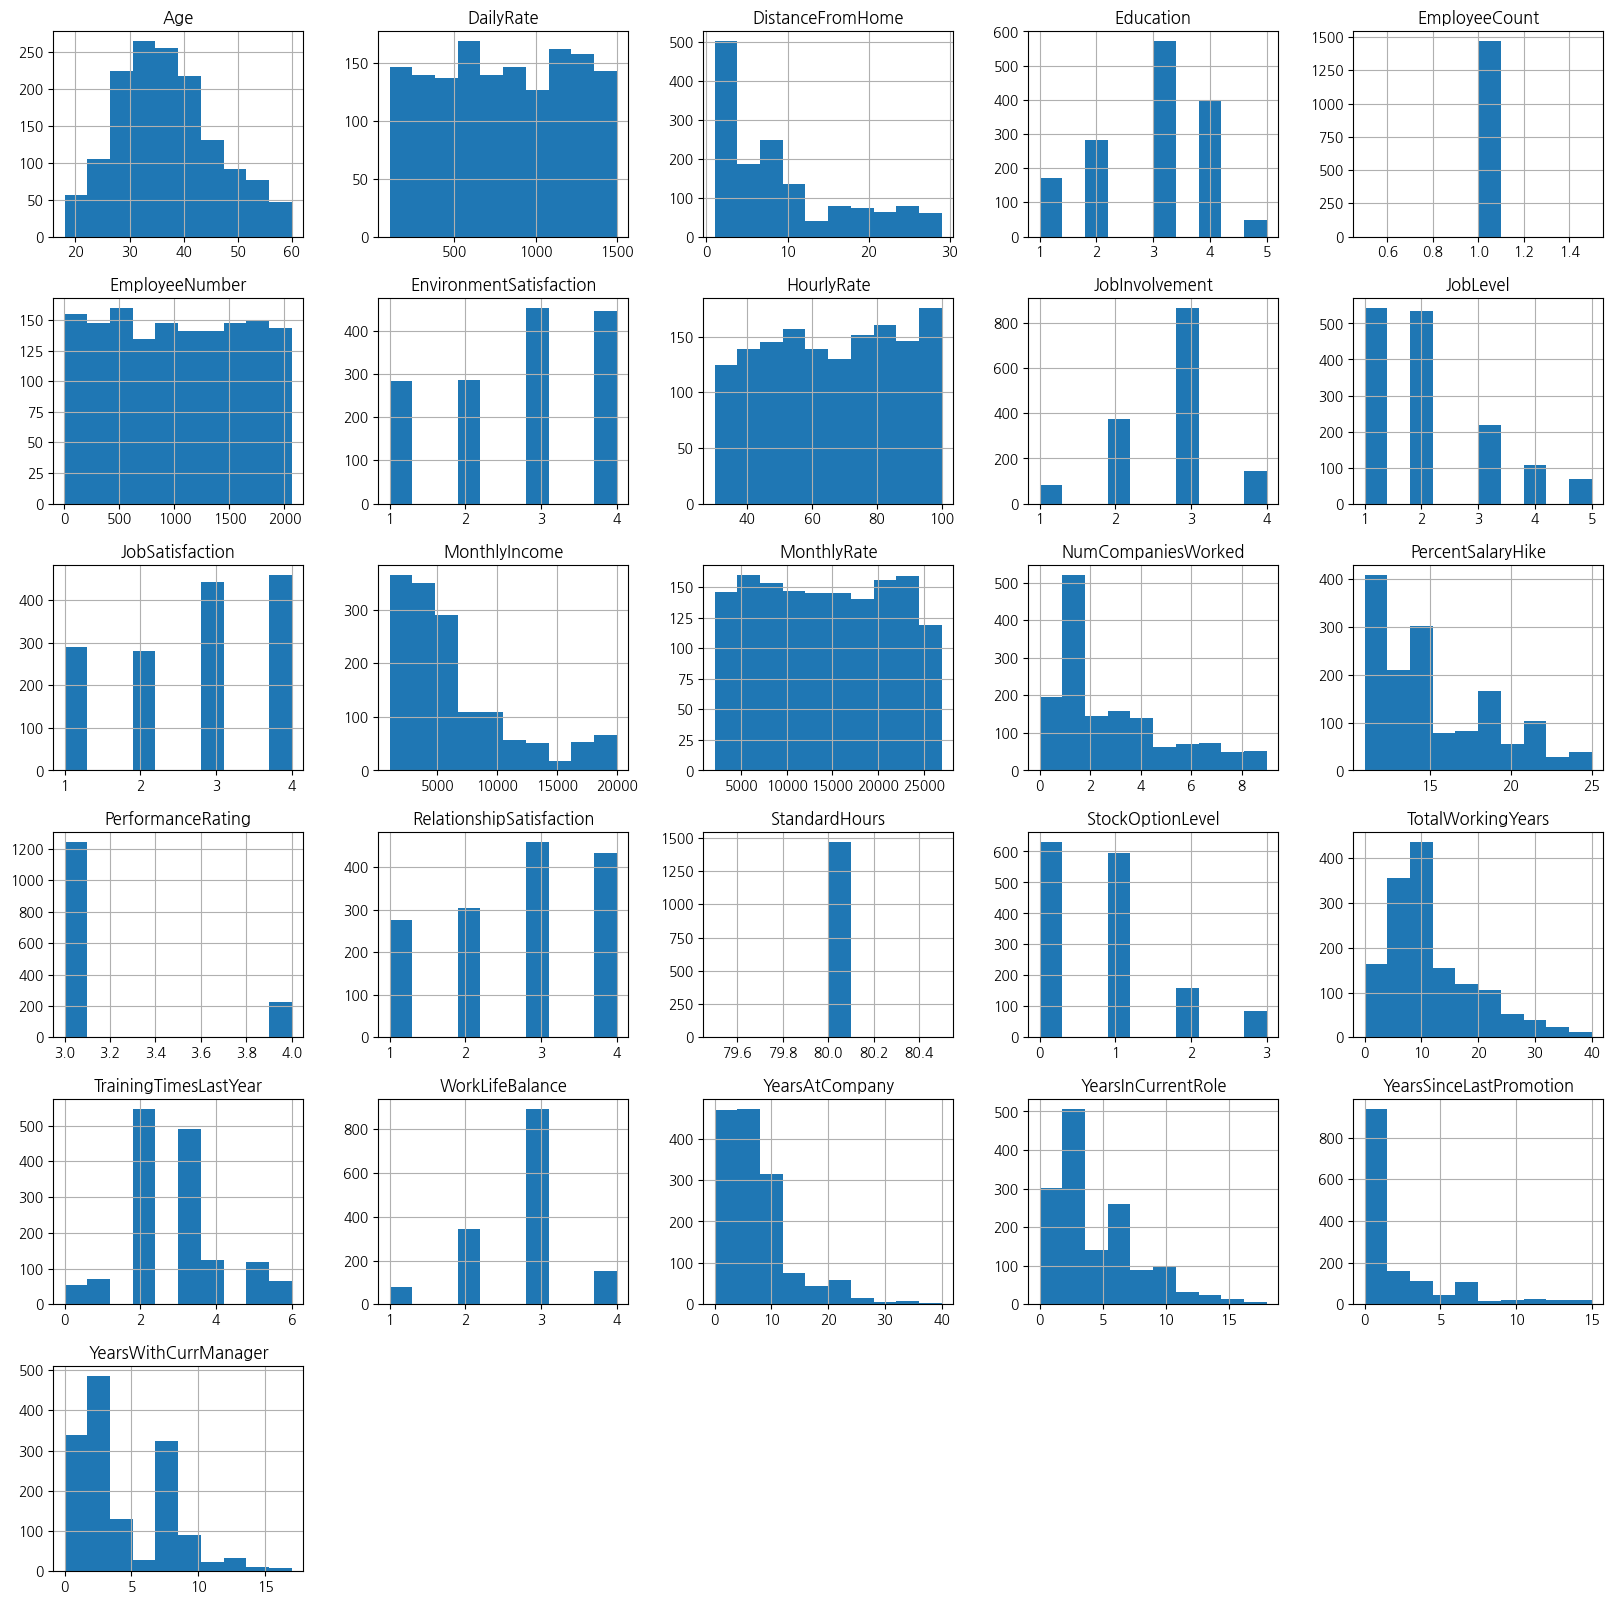

In [85]:
df.hist(figsize=(20, 20))
plt.show()
# 전체 데이터 히스토그램 -> EmployeeCount, StandardHours 

In [15]:
# 데이터 자르기 
df1 = df[:1000]
df1.shape

(1000, 35)

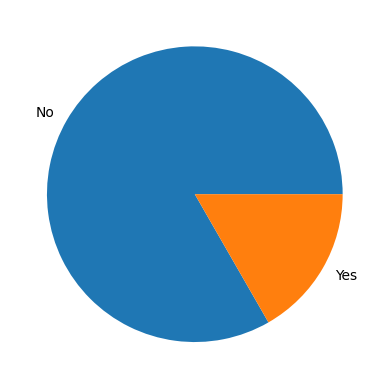

In [16]:
# Attrition 퇴사인지 아닌지 
att = df1['Attrition'].value_counts()

# 파이 차트
plt.pie(att, labels=['No', 'Yes'])
plt.show()

In [87]:
# 상관관계 파악하기
corr = df.corr()
print(corr.shape)

(26, 26)


<ipython-input-87-b77185a23e70>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

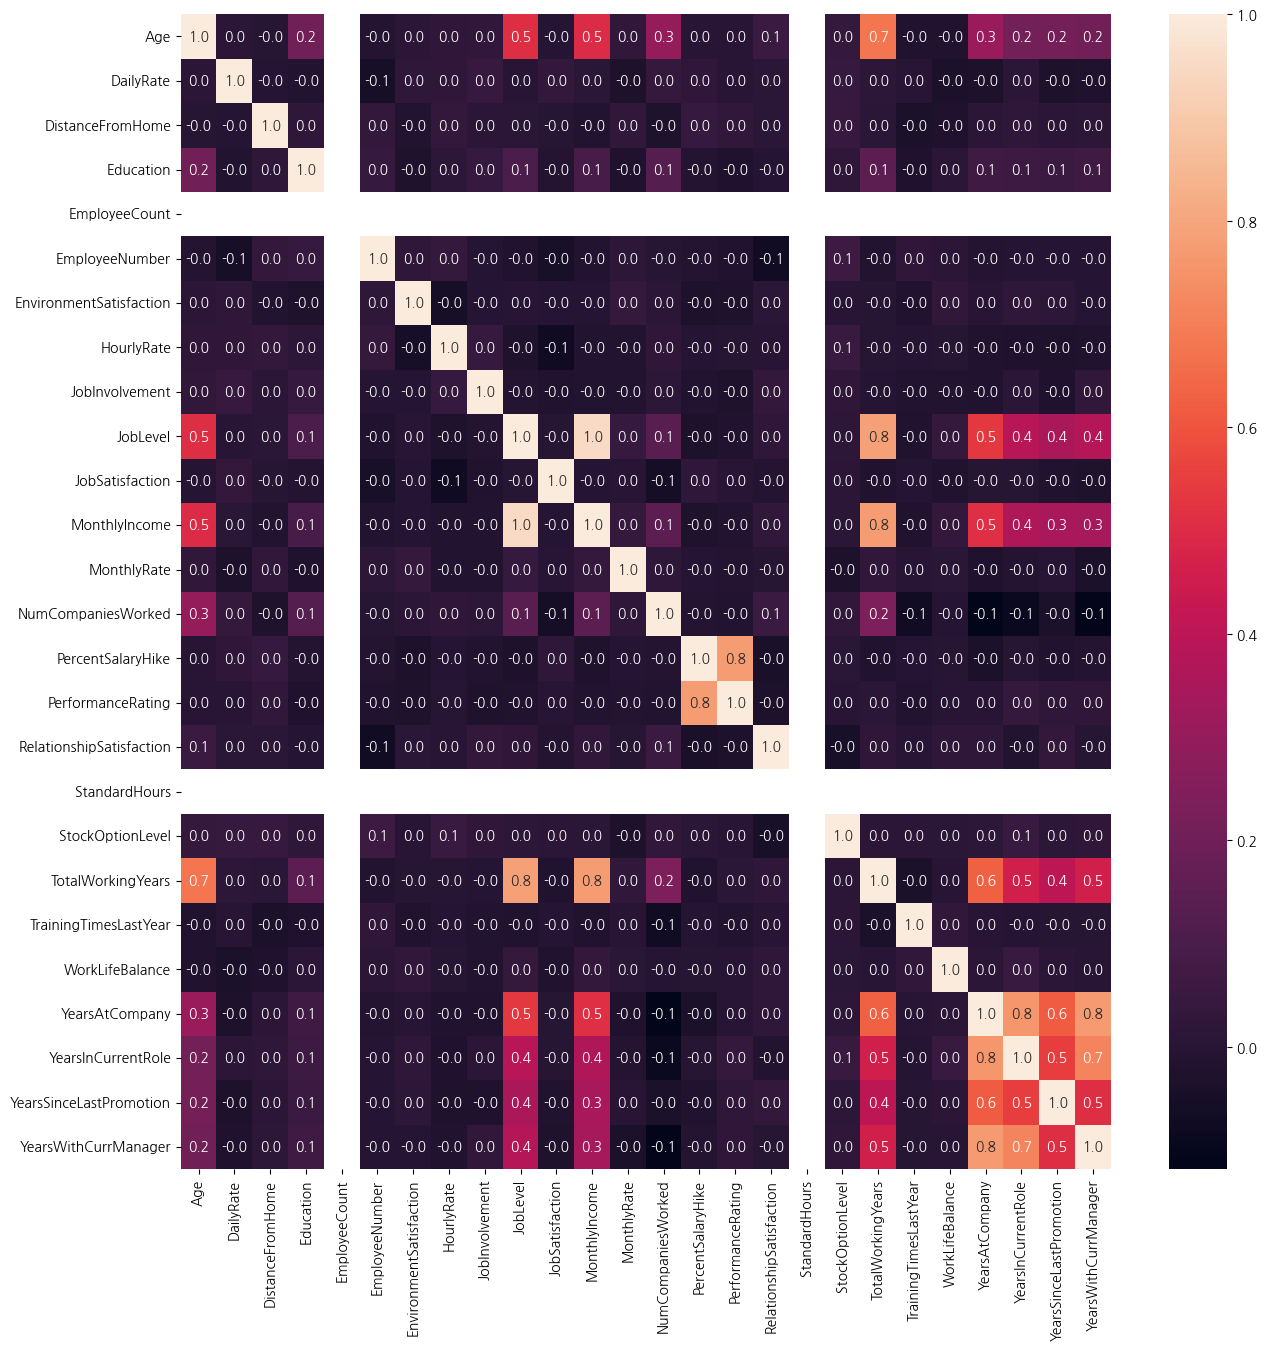

In [89]:
plt.figure(figsize=(15, 15))
sns.heatmap(corr, fmt='.1f', annot=True)

# 문자로 된 컬럼들 제외됨 - Attrition 

# -1, 1 양 끝 값에 가까울수록 상관관계 높음 
# 0.3 < a : 상관관계가 있다
# 0.7 < a : 상관관계가 높다 

# PercentSalaryHike - PerformanceRating 0.8
# TotalWorkingYears - Age 0.7
# TotalWorkingYears - JobLevel 0.8
# YearsWithCurrManager - YearsAtCompany 0.8
# YearsWithCurrManager - YearsInCurrentRole 0.7

#### 필요없는 데이터 drop 시키기

In [19]:
# EmployeeCount
print(df['EmployeeCount'].unique())

# StandardHours
print(df['StandardHours'].unique())

[1]
[80]


In [20]:
df1 = df1.drop(['EmployeeCount', 'StandardHours'], axis=1)

In [21]:
df1.shape # columns 35 -> 33

(1000, 33)

#### 상관관계가 높은 변수들 위주로 데이터 탐색하기

- PercentSalaryHike - PerformanceRating 0.8
- TotalWorkingYears - Age 0.7
- TotalWorkingYears - JobLevel 0.8
- YearsWithCurrManager - YearsAtCompany 0.8
- YearsWithCurrManager - YearsInCurrentRole 0.7

In [22]:
# 전체 직원 중 퇴사 인원 비율 
attrition = df1['Attrition'][df1['Attrition'] == 'Yes'].count()
total = df1['Attrition'].count()

print(attrition)
print(total)

167
1000


In [23]:
attrition_p = (attrition / total) * 100 # 전체 직원 중 16.7%가 퇴사함 
n_attrition = 100 - attrition_p

print(print(attrition_p))
print(n_attrition)

16.7
None
83.3


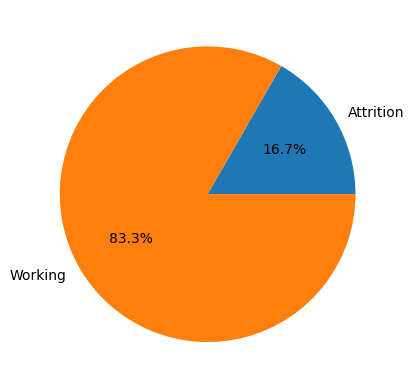

In [24]:
label = ['Attrition', 'Working']
plt.pie([attrition_p, n_attrition], labels=label, autopct='%.1f%%')
plt.show()

#### 직급에 따른 퇴사 비율

In [25]:
df1['JobLevel'].value_counts()
# Entry, Mid, Senior, Lead, Executive

1    370
2    347
3    155
4     74
5     54
Name: JobLevel, dtype: int64

In [26]:
# pades Categorical
df1['JobLevel'] = pd.Categorical(df1['JobLevel']).rename_categories(
    ['Entry', 'Mid', 'Senior', 'Lead', 'Executive'])

df1['JobLevel'].value_counts() # 전체 레벨 분포 

Entry        370
Mid          347
Senior       155
Lead          74
Executive     54
Name: JobLevel, dtype: int64

In [27]:
df1['JobLevel'].unique()

['Mid', 'Entry', 'Senior', 'Lead', 'Executive']
Categories (5, object): ['Entry', 'Mid', 'Senior', 'Lead', 'Executive']

In [28]:
attrition_joblevel = df1['JobLevel'][df1['Attrition']=='Yes']
attrition_joblevel.value_counts() # 퇴사자들 중 레벨 분포 

Entry        101
Mid           35
Senior        22
Executive      5
Lead           4
Name: JobLevel, dtype: int64

In [29]:
attrition_joblevel.unique()

['Mid', 'Entry', 'Executive', 'Senior', 'Lead']
Categories (5, object): ['Entry', 'Mid', 'Senior', 'Lead', 'Executive']

In [30]:
!pip install koreanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 41.5 MB/s eta 0:00:00


In [31]:
import koreanize_matplotlib

##### 그래프

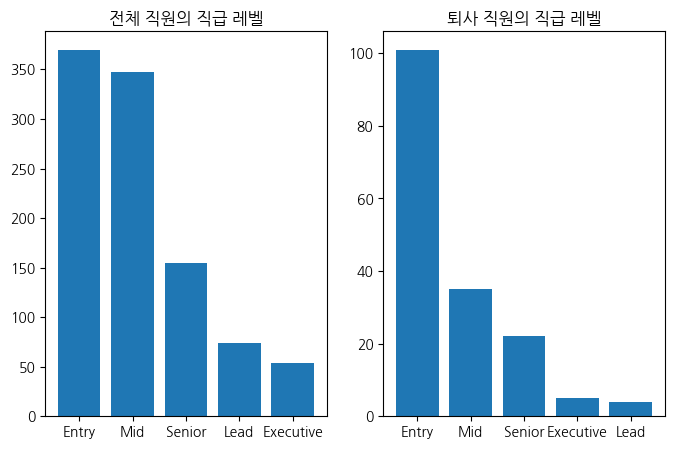

In [32]:
plt.figure(figsize=(8, 5))

plt.subplot(1, 2, 1)
plt.title('전체 직원의 직급 레벨')
plt.bar(df1['JobLevel'].value_counts().index, df1['JobLevel'].value_counts())

plt.subplot(1, 2, 2)
plt.title('퇴사 직원의 직급 레벨')
plt.bar(attrition_joblevel.value_counts().index, attrition_joblevel.value_counts())

plt.show()

##### 적절한 인덱스 넣기 #####

In [33]:
df1['JobLevel']

0        Mid
1        Mid
2      Entry
3      Entry
4      Entry
       ...  
995      Mid
996      Mid
997    Entry
998    Entry
999     Lead
Name: JobLevel, Length: 1000, dtype: category
Categories (5, object): ['Entry', 'Mid', 'Senior', 'Lead', 'Executive']

In [34]:
df1['JobLevel'].sort_values() # 오름차순
# df1['JobLevel'].sort_values(ascending=False) # 내림차순 5 -> 1

769        Entry
762        Entry
763        Entry
269        Entry
764        Entry
         ...    
244    Executive
922    Executive
237    Executive
233    Executive
270    Executive
Name: JobLevel, Length: 1000, dtype: category
Categories (5, object): ['Entry', 'Mid', 'Senior', 'Lead', 'Executive']

#### 나이에 따른 퇴사 비율

In [35]:
# 나이에 따른 퇴사 비율
df1['Age'].unique()

array([41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 29, 31, 34, 28, 22, 53,
       24, 21, 42, 44, 46, 39, 43, 50, 26, 48, 55, 45, 56, 23, 51, 40, 54,
       58, 20, 25, 19, 57, 52, 47, 18, 60])

In [36]:
df1['Age'].describe()

count    1000.000000
mean       36.992000
std         9.417783
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

In [37]:
# 나이대 구간 별로 나누기 -> 10~60대
df1['Age_10'] = df1['Age'][(df1['Age'] >= 10) & (df1['Age'] < 20)]  # 10 이상 20 미만
# (df1['Age'] // 10) == 1  # 10으로 나눴을 때 몫이 1

df1['Age_10'].value_counts()

19.0    9
18.0    6
Name: Age_10, dtype: int64

In [38]:
# 원하는 형식으로 조건에 맞는 값들만 넣어준다.
df1['Age_10'] = df1['Age'][(df1['Age'] >= 10) & (df1['Age'] < 20)]
df1['Age_20'] = df1['Age'][(df1['Age'] >= 20) & (df1['Age'] < 30)]
df1['Age_30'] = df1['Age'][(df1['Age'] >= 30) & (df1['Age'] < 40)]
df1['Age_40'] = df1['Age'][(df1['Age'] >= 40) & (df1['Age'] < 50)]
df1['Age_50'] = df1['Age'][(df1['Age'] >= 50) & (df1['Age'] < 60)]
df1['Age_60'] = df1['Age'][(df1['Age'] >= 60) & (df1['Age'] < 70)]

In [39]:
df1['Age_40']

0      41.0
1      49.0
2       NaN
3       NaN
4       NaN
       ... 
995    43.0
996     NaN
997     NaN
998     NaN
999    42.0
Name: Age_40, Length: 1000, dtype: float64

In [40]:
# 데이터프레임(시리즈) 병합 : concat(outer), merge(inner)
# join -> outer, inner, left, right
ages = [df1['Age_10'], df1['Age_20'], df1['Age_30'], 
        df1['Age_40'], df1['Age_50'], df1['Age_60']]
ages_cols = pd.concat(ages, axis=1)
ages_cols

,Age_10,Age_20,Age_30,Age_40,Age_50,Age_60
0,NaN,NaN,NaN,41.0,NaN,NaN
1,NaN,NaN,NaN,49.0,NaN,NaN
2,NaN,NaN,37.0,NaN,NaN,NaN
3,NaN,NaN,33.0,NaN,NaN,NaN
4,NaN,27.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
995,NaN,NaN,NaN,43.0,NaN,NaN
996,NaN,27.0,NaN,NaN,NaN,NaN
997,NaN,27.0,NaN,NaN,NaN,NaN
998,NaN,26.0,NaN,NaN,NaN,NaN


In [41]:
col_name = list(ages_cols.columns)
col_name

['Age_10', 'Age_20', 'Age_30', 'Age_40', 'Age_50', 'Age_60']

In [42]:
# pd.merge(age_10, age_20, how='outer')

행에 다른 값을 찾아갈 때

1. numpy where
- `np.where(조건(반복되는 부분), 참일 때 넣어줄 값, 거짓일 때 넣어줄 값)`
- for문을 이용해서 변하는 변수들을 바꿔줌

2. pandas loc 
- `df.loc['label(인덱스)', 'col(컬럼명)']`
- for문을 이용해서 변하는 변수들을 바꿔줌


> for문 순회할 때
원하는 값을 모으고 싶으면 for문 바깥에 변수(저장할 공간)를 선언해야함


In [43]:
# 조건에 따라서 컬럼, 행으로 값을 넣어줌
# 행 기준으로 데이터를 순회하면서 값이 있는 것을 새로운 컬럼에 넣어준다.

# 새로운 컬럼 생성
df1['Ages'] = ''

col_dic = {
    'Age_10': '10대',
    'Age_20': '20대',
    'Age_30': '30대',
    'Age_40': '40대',
    'Age_50': '50대',
    'Age_60': '60대'
}

# 1. numpy where 
# np.where(조건, 참일 때 넣을 값, 거짓일 때 넣을 값)
import numpy as np

for col, age in col_dic.items():
    df1['Ages'] = np.where(df1[col].notnull(), age, df1['Ages'])

# 2. pandas loc -> Boolean Indexing 
# df.loc['label', 'col: 변하는 부분']
# 연령대 컬럼을 하나의 컬럼으로 표현
for col, age in col_dic.items():
    df1.loc[df1[col].notnull(), 'Ages'] = age

# 컬럼 삭제: 선택사항
# df1.drop(col_name, axis=1, inplace=True)

df1['Ages']

0      40대
1      40대
2      30대
3      30대
4      20대
      ... 
995    40대
996    20대
997    20대
998    20대
999    40대
Name: Ages, Length: 1000, dtype: object

In [44]:
df1['Age_10'].value_counts() 
# df1['Age_10'] == df1.loc[:,'Age_10']

19.0    9
18.0    6
Name: Age_10, dtype: int64

---

In [95]:
age_10 = df1['Age'][df1['Age_10'].notnull()] # 10대 고유의 인덱스값
age_20 = df1['Age'][df1['Age_20'].notnull()] # 20대 고유의 인덱스값
age_30 = df1['Age'][df1['Age_30'].notnull()] # 30대 고유의 인덱스값
age_40 = df1['Age'][df1['Age_40'].notnull()] # 40대 고유의 인덱스값
age_50 = df1['Age'][df1['Age_50'].notnull()] # 50대 고유의 인덱스값
age_60 = df1['Age'][df1['Age_60'].notnull()] # 60대 고유의 인덱스값

In [96]:
i_10 = age_10.index # 10대 인덱스

df1.loc[i_10, 'Ages'] = '10대'
# df1.loc[i_10]['Ages'] = '10대'

df1.loc[i_10, 'Ages']
# df1.loc[i_10]['Ages']
# df1.loc[i_10].iloc[:, -1]

127    10대
149    10대
171    10대
177    10대
296    10대
301    10대
422    10대
457    10대
688    10대
727    10대
828    10대
853    10대
892    10대
909    10대
972    10대
Name: Ages, dtype: object

In [97]:
i_20 = age_20.index
i_30 = age_30.index
i_40 = age_40.index
i_50 = age_50.index
i_60 = age_60.index

df1.loc[i_20, 'Ages'] = '20대'
df1.loc[i_30, 'Ages'] = '30대'
df1.loc[i_40, 'Ages'] = '40대'
df1.loc[i_50, 'Ages'] = '50대'
df1.loc[i_60, 'Ages'] = '60대'

In [98]:
# 전체 연령대
df1['Ages']

0      40대
1      40대
2      30대
3      30대
4      20대
      ... 
995    40대
996    20대
997    20대
998    20대
999    40대
Name: Ages, Length: 1000, dtype: object

In [49]:
# 퇴사자 연령대
attrition_ages = df1['Ages'][df1['Attrition'] == 'Yes']
attrition_ages.value_counts()

30대    60
20대    57
40대    24
50대    17
10대     9
Name: Ages, dtype: int64

##### 그래프

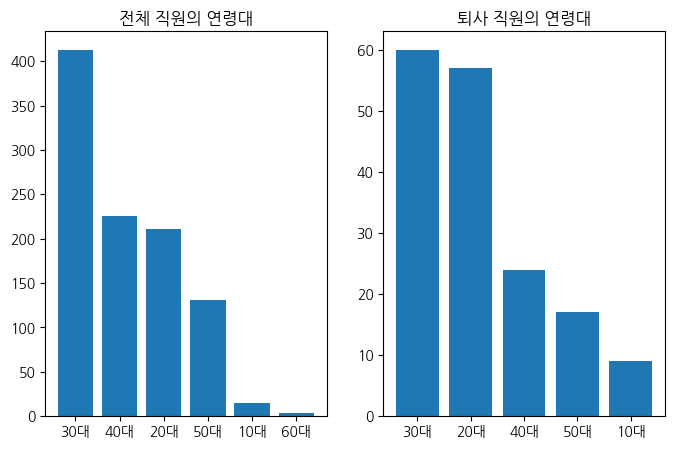

In [50]:
plt.figure(figsize=(8, 5))

plt.subplot(1, 2, 1)
plt.title('전체 직원의 연령대')
plt.bar(df1['Ages'].value_counts().index, df1['Ages'].value_counts())

plt.subplot(1, 2, 2)
plt.title('퇴사 직원의 연령대')
plt.bar(attrition_ages.value_counts().index, attrition_ages.value_counts())
plt.show()

In [51]:
# sns.barplot(data=df1, x='Ages', y='annual_s', hue='Attrition')

#### 직급에 따른 연봉

In [52]:
# 직급 = JobLevel
# 월수익 = MonthlyIncome * 12 => 연봉
df1['annual_s'] = df1['MonthlyIncome'] * 12
df1['annual_s']

0       71916
1       61560
2       25080
3       34908
4       41616
        ...  
995     48972
996     69228
997     28728
998     46848
999    201588
Name: annual_s, Length: 1000, dtype: int64

In [53]:
# 직급 별 연봉
# 기준이 되는 데이터, 적용할 데이터 -> groupby

# groupby('기준이 되는 데이터')['컬럼'].함수()
job_annual_s = df1.groupby('JobLevel')['annual_s'].mean()
job_annual_s

JobLevel
Entry         33264.681081
Mid           65457.475504
Senior       118516.877419
Lead         185649.081081
Executive    229540.888889
Name: annual_s, dtype: float64

In [73]:
a_job_annual_s = df1[df1['Attrition']=='Yes'].groupby('JobLevel')['annual_s'].mean()
a_job_annual_s

JobLevel
Entry         31654.099010
Mid           65485.028571
Senior       114282.545455
Lead         158448.000000
Executive    233565.600000
Name: annual_s, dtype: float64

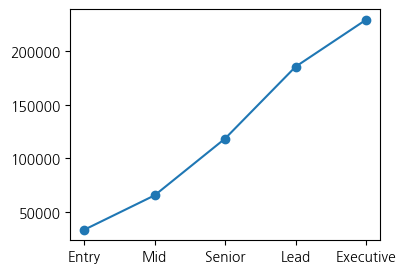

In [54]:
# 연속된 값이 아니기 때문에 선 그래프(plot) 적절하지 않음
plt.figure(figsize=(4, 3))
plt.plot(job_annual_s, 'o-')
plt.show()

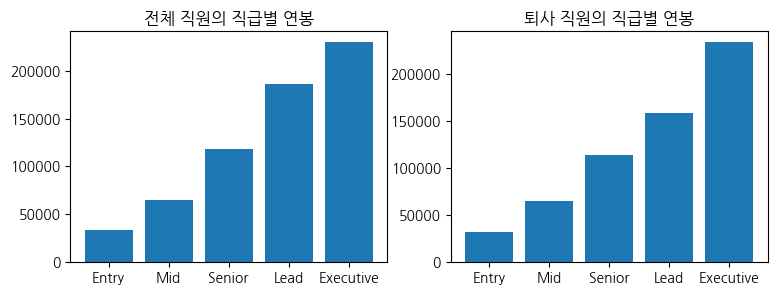

In [101]:
plt.figure(figsize=(9, 3))
plt.subplot(1, 2, 1)
plt.title('전체 직원의 직급별 연봉')
plt.bar(job_annual_s.index, job_annual_s)

# 퇴사자의 직급별 연봉
plt.subplot(1, 2, 2)
plt.title('퇴사 직원의 직급별 연봉')
plt.bar(a_job_annual_s.index, a_job_annual_s)
plt.show()

<Axes: xlabel='JobLevel', ylabel='annual_s'>

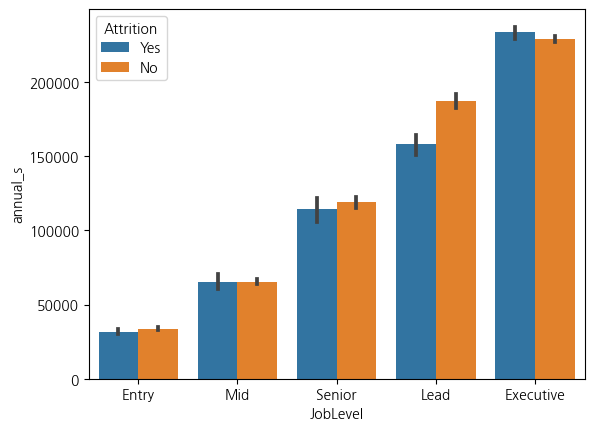

In [56]:
sns.barplot(data=df1, x='JobLevel', y='annual_s', hue='Attrition')

#### 성별에 따른 퇴사 비율 (퇴사자 중 남녀성비)

In [58]:
df1['Gender'].value_counts()

Male      584
Female    416
Name: Gender, dtype: int64

In [59]:
# 퇴사자를 먼저 뽑고 성별대로 분리
# Boolean Indexing
g_attrition = df['Gender'][df['Attrition'] == 'Yes']
g_attrition

0       Female
2         Male
14        Male
21        Male
24        Male
         ...  
1438      Male
1442      Male
1444      Male
1452      Male
1461      Male
Name: Gender, Length: 237, dtype: object

In [60]:
# groupby
# df1.groupby('Gender')['Attrition'].sum()

# one-hot encoding : 텍스트 -> 숫자
# 남/녀, 정상/비정상, 오전/오후 ...

# Gender -> Male(0), Female(1)

# 1. pandas 제공 get_dummies
oh_gender = pd.get_dummies(df1, columns=['Gender'])
oh_gender.iloc[:, -2:] # gender 별 분류 -> 성별 카운팅 가능 

,Gender_Female,Gender_Male
0,1,0
1,0,1
2,0,1
3,1,0
4,0,1
...,...,...
995,1,0
996,1,0
997,1,0
998,0,1


In [61]:
oh_gender['Gender_Female'][oh_gender['Gender_Female']==1].count()

416

In [62]:
# 2. Scikitlearn 머신러닝에서 사용되는 모듈
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
# ohe.fit('')

In [63]:
# 연봉에 따른 퇴사 비율

In [64]:
# 연차에 따른 퇴사 비율